# Predykcja ataku phishingowego w wiadomości <b>e-mail</b> za pomocą <b><i>nadzorowanego nauczania maszynowego</i></b>
Dataset: 
<ul>
    <li><i><b>Phishing Email Curated Datasets</b></i></li>
    <ul>
        <li><a href="https://zenodo.org/records/8339691" target="_blank">https://zenodo.org/records/8339691</a></li>
    </ul>
</ul>

### Pobieranie niezbędnych modułów
<ul>
    <li> pandas - praca z <i>Data Framami</i></li>
    <li> numpy - obliczenia</li>
    <li> matplotlib.pyplot - wizualizacja</li>
    <li> sklearn - wszelakie narzędzia do <i>Machine Learningu</i></li>
</ul>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skm

import import_ipynb
import re
from unidecode import unidecode
from termcolor import colored

### Wczytanie uprzednio przygotowanego Data Framu

In [2]:
learning_set = pd.read_csv('ML_DataFrame.csv')
print(learning_set.head())

   Unnamed: 0  label  urls_count  protocol  contains_ip  url_length  \
0           0    1.0         1.0       0.0          0.0        21.0   
1           1    1.0         1.0       0.0          0.0        25.0   
2           2    1.0         3.0       0.0          0.0       110.0   
3           3    0.0         3.0       0.0          0.0        22.0   
4           4    1.0         1.0       0.0          0.0       136.0   

   TLD_alpha  subdomain_level  slash_count  dots_count  hyphens_count  \
0        1.0              0.0          3.0         1.0            0.0   
1        1.0              1.0          2.0         2.0            0.0   
2        1.0              1.0          6.0         5.0            0.0   
3        0.0              1.0          2.0         2.0            0.0   
4        1.0              2.0          4.0         4.0            2.0   

   has_non_latin  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [3]:
print(learning_set.isna().sum())
learning_set.dropna(inplace=True)

Unnamed: 0          0
label               0
urls_count          0
protocol            0
contains_ip         0
url_length          0
TLD_alpha           0
subdomain_level    84
slash_count         0
dots_count          0
hyphens_count       0
has_non_latin       0
dtype: int64


### Wybieranie X i y
X:
<ul>
<li> urls_count </li>
<li>protocol </li>
<li> contains_ip </li>
<li> url_length </li>
<li> TLD_alpha </li>
<li> subdomain_level </li>
<li> slash_count </li>
<li> dots_count </li>
<li> hyphens_count </li>
<li> has_non_latin </li>
</ul>
y:
<ul>
    <li> label </li>
</ul>

In [22]:
X = learning_set.loc[:, 'urls_count':'has_non_latin'].values
y = learning_set.loc[: , 'label'].values
print(X.shape, y.shape)

<class 'numpy.ndarray'>
(41632, 10) (41632,)


### Rozdzielanie X, y na treningowe i testowe zestawy

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Normalizujemy wartość <b><i>X</i></b>-ów

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33305, 10) (8327, 10) (33305,) (8327,)


### Szukanie najlepszych parametrów dla <i>KNeighborsClassifier</i>


In [8]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
params = {
    'n_neighbors': np.arange(1, 15, 1),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=params, cv=kf)
knn_cv.fit(X_train, y_train)

print('Najlepsze parametry dla KNeighborsClassifier:')
for p, val in knn_cv.best_params_.items():
    print('{}: {}'.format(p, val), end='\n')
print('Uzyskana precyzja: ', knn_cv.best_score_)

best_knn = knn_cv.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print("Precyzja zestawu testowego:", test_accuracy)



Najlepsze parametry dla KNeighborsClassifier:
n_neighbors: 13
p: 1
weights: distance
Uzyskana precyzja:  0.8729022068366331
Precyzja zestawu testowego: 0.8734238020895881


### Szukanie najlepszych parametrów dla <i>LogisticRegression</i>


In [9]:
from sklearn.linear_model import LogisticRegression
kf = KFold(n_splits=6, shuffle=True, random_state=42)
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10] 
}
logreg_forest = LogisticRegression()
logreg_cv = GridSearchCV(logreg_forest, param_grid=params, cv=kf)
logreg_cv.fit(X_train, y_train)

print('Najlepsze parametry dla LogisticRegression:')
for p, val in logreg_cv.best_params_.items():
    print('{}: {}'.format(p, val), end='\n')
print('Uzyskana precyzja: ', logreg_cv.best_score_)

best_logreg = logreg_cv.best_estimator_
test_accuracy = best_logreg.score(X_test, y_test)
print("Precyzja zestawu testowego:", test_accuracy)

Najlepsze parametry dla LogisticRegression:
C: 10
penalty: l2
Uzyskana precyzja:  0.7300107493550115
Precyzja zestawu testowego: 0.7341179296265161


C:\Users\Patryk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Patryk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Patryk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

### Szukanie najlepszych parametrów dla <i>DecisionTreeClassifier</i>

In [10]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_grid=params, cv=kf)
tree_cv.fit(X_train, y_train)

print('Najlepsze parametry dla DecisionTreeClassifier:')
for p, val in tree_cv.best_params_.items():
    print('{}: {}'.format(p, val), end='\n')
print('Uzyskana precyzja: ', tree_cv.best_score_)

best_tree = tree_cv.best_estimator_
test_accuracy = best_tree.score(X_test, y_test)
print("Precyzja zestawu testowego:", test_accuracy)

Najlepsze parametry dla DecisionTreeClassifier:
criterion: gini
max_depth: None
min_samples_leaf: 1
min_samples_split: 2
Uzyskana precyzja:  0.8709505361964377
Precyzja zestawu testowego: 0.8703014290861054


### Szukanie najlepszych parametrów dla <i>RandomForestClassifier</i>

In [11]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=6, shuffle=True, random_state=42)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}
rand_forest = RandomForestClassifier()
rand_forest_cv = GridSearchCV(rand_forest, param_grid=params, cv=kf)
rand_forest_cv.fit(X_train, y_train)

print('Najlepsze parametry dla RandomForestClassifier:')
for p, val in rand_forest_cv.best_params_.items():
    print('{}: {}'.format(p, val), end='\n')
print('Uzyskana precyzja: ', rand_forest_cv.best_score_)

best_rand_forest = rand_forest_cv.best_estimator_
test_accuracy = best_rand_forest.score(X_test, y_test)
print("Precyzja zestawu testowego:", test_accuracy)

Najlepsze parametry dla RandomForestClassifier:
max_depth: None
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 200
Uzyskana precyzja:  0.8760548514646875
Precyzja zestawu testowego: 0.8723429806653056


### Szukanie najlepszych parametrów dla <i>SVM Classifier</i>

In [12]:
from sklearn.svm import SVC

kf = KFold(n_splits=6, shuffle=True, random_state=42)
params = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid=params, cv=kf)
svm_cv.fit(X_train, y_train)

print('Najlepsze parametry dla SVM Classifier:')
for p, val in svm_cv.best_params_.items():
    print('{}: {}'.format(p, val), end='\n')
print('Uzyskana precyzja: ', svm_cv.best_score_)

best_svm = svm_cv.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)
print("Precyzja zestawu testowego:", test_accuracy)

Najlepsze parametry dla SVM Classifier:
C: 10
gamma: 1
kernel: rbf
Uzyskana precyzja:  0.8508033776886236
Precyzja zestawu testowego: 0.8576918458028101


## Ewaluacja modeli

In [13]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=13, p=1, weights='distance'),
    'LogisticRegression': LogisticRegression(C=10, penalty='l2'),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2),
    'RandomForestClassifier': RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50),
    'SVM Classifier': SVC(C=10, gamma=1, kernel='rbf')
}

results = []
for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

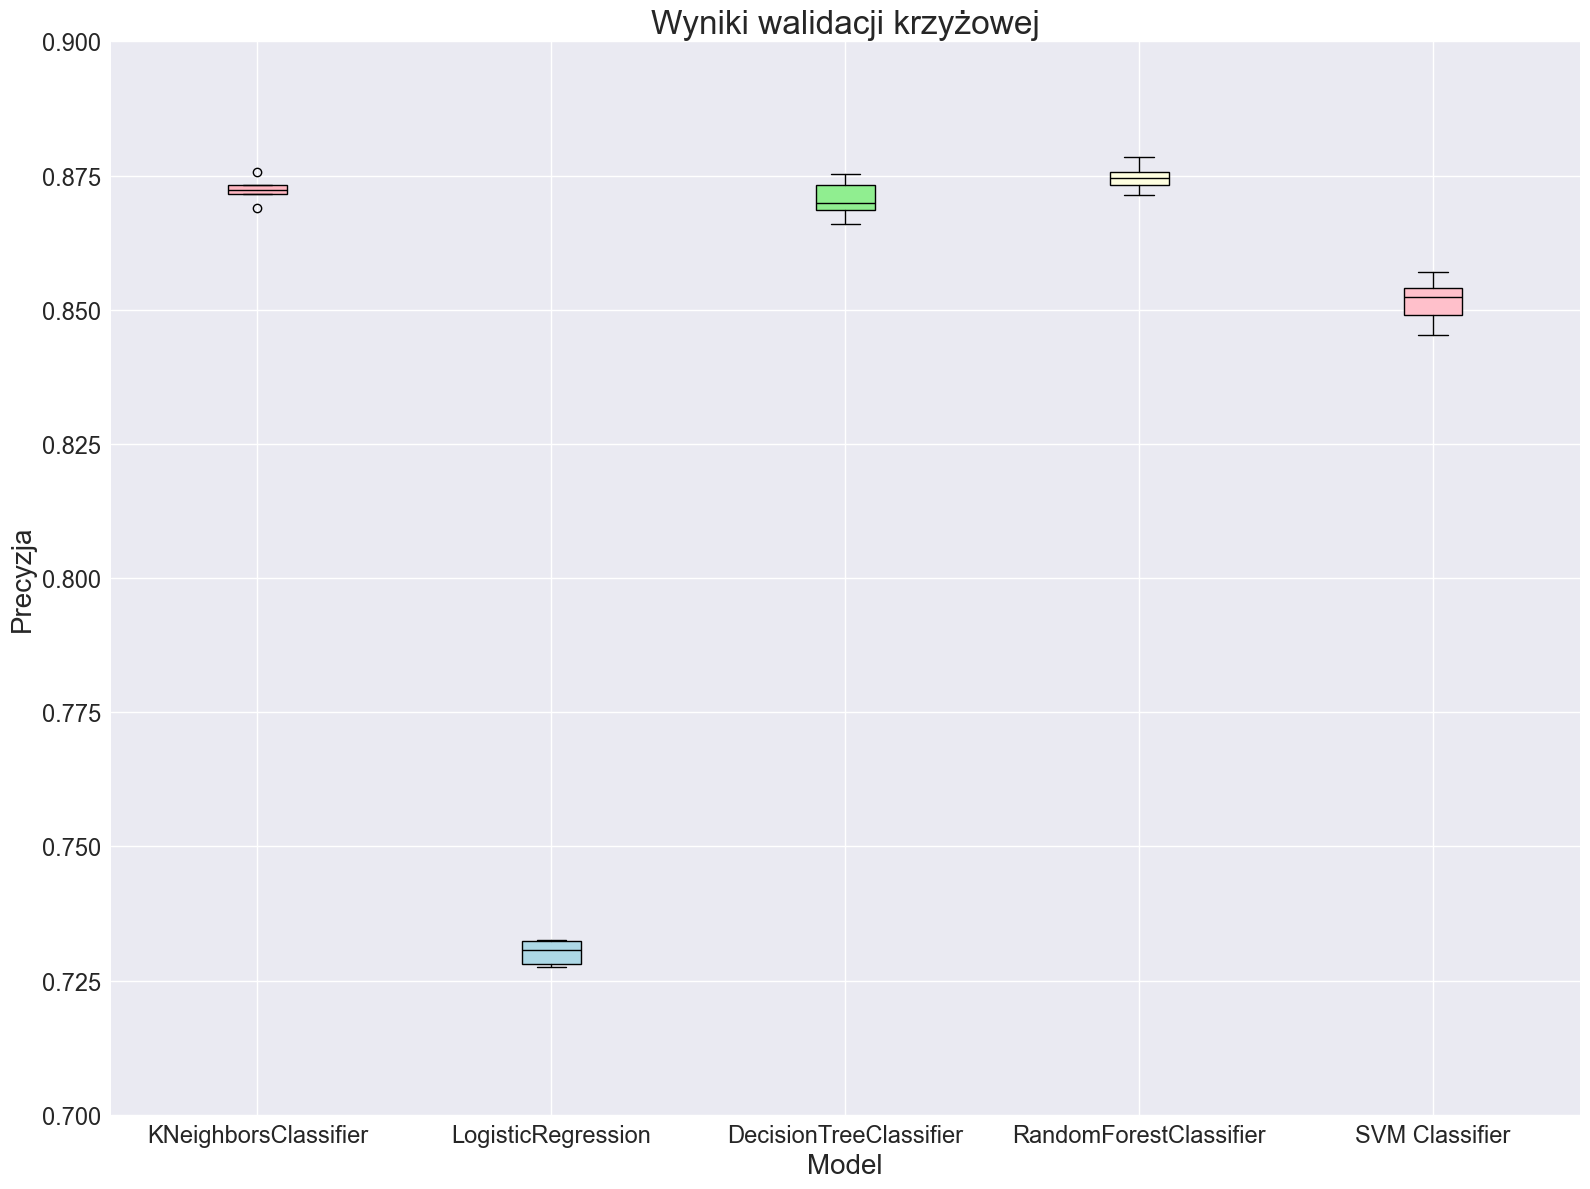

In [14]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(16, 12))

boxplot = ax.boxplot(
    results,
    labels=models.keys(),
    patch_artist=True,
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(linewidth=1),
    capprops=dict(linewidth=1),
    medianprops=dict(color='black', linewidth=1),
    widths=0.2,
)

box_colors = ['#FFB6C1', '#ADD8E6', '#90EE90', '#FFFFE0', '#FFC0CB']
for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

ax.set_title('Wyniki walidacji krzyżowej', fontsize=24)
ax.tick_params(axis='both', labelsize=17)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('Precyzja', fontsize=20)
ax.set_ylim(0.70, 0.9)
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### Nauczanie najskuteczniejszego modelu
Najlepszy okazał się <b><i>RandomForestClassifier</i></b>

In [15]:
import sklearn.metrics as skm
random_forest = RandomForestClassifier(max_depth=None,
                                       min_samples_leaf=1,
                                       min_samples_split=10,
                                       n_estimators=50)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
confusion_matrix = skm.confusion_matrix(y_test, y_pred)

target_names = ['safe', 'phishing']
class_report = skm.classification_report(y_test, y_pred, target_names=target_names)
print(class_report)

              precision    recall  f1-score   support

        safe       0.84      0.82      0.83      3175
    phishing       0.89      0.90      0.90      5152

    accuracy                           0.87      8327
   macro avg       0.87      0.86      0.87      8327
weighted avg       0.87      0.87      0.87      8327



### Skuteczność modelu

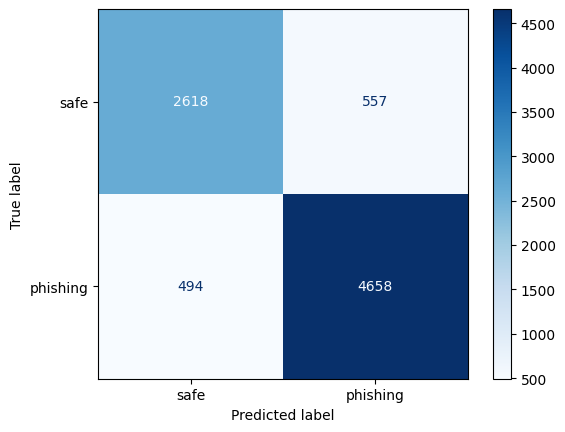

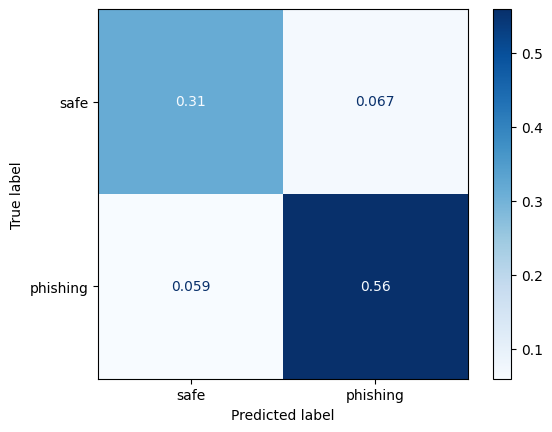

In [16]:
plt.style.use('default')
cm_display = skm.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['safe', 'phishing'])

cm_display.plot(cmap='Blues')
plt.show()

# Wartości względne
cm_display = skm.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix/np.sum(confusion_matrix),
    display_labels=['safe', 'phishing'])
    
cm_display.plot(cmap='Blues')
plt.show()

In [35]:
import re
from unidecode import unidecode


def parse_mail_to_nums(mail: dict):
    body = mail['body']
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    urls = re.findall(url_pattern, body)
    # urls_count
    urls_count = len(urls)
    url = urls[np.random.randint(0, urls_count)]
    # protocol
    protocol = url[:5].lower()
    protocol = 'https' if protocol == 'https' else 'http'
    # contains_ip
    IP_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b|\b(?:[0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}\b')
    IPs = IP_pattern.findall(url)
    contains_ip = 1 if IPs else 0
    # url_length
    url_length = len(url)
    # TLD_alpha
    pattern = re.compile(r'https?://([^/?]+)')
    match = pattern.match(url)
    if match:
        domain = match.group(1)
        if '/' in domain:
            domain = domain.split('/')[0]
    else:
        domain = url
    
    split_domain = domain.split('.')
    n = len(split_domain)
    delimiters = ['/', ':', ')', ']', '%', '_', '=', ',', '>', '"', '#', '!']
    # Check if not weird ending
    after_dot = split_domain[n-1]
    if len(after_dot) > 2 and not after_dot.isalpha():
        after_dot = after_dot.split('/')[0]
        
        if len(after_dot) > 2 and not after_dot.isalpha():
            print(after_dot, 'INSIDE')
            for delimiter in delimiters:
                after_dot = " ".join(after_dot.split(delimiter))
            
            after_dot = after_dot.split()[0]

    TLD = '.'+after_dot.lower()
    TLD_alpha = TLD[1:].isalpha()
    # subdomain_level
    subdomain_level = domain.count('.')-1
    # slash_count
    slash_count = url.count('/')
    # dots_count
    dots_count = url.count('.')
    # hyphens_count
    hyphens_count = url.count('-')
    # has_non_latin
    ascii = unidecode(url)
    has_non_latin = url != ascii

    data = {
        'urls_count': urls_count,
        'protocol': protocol,
        'contains_ip': contains_ip,
        'url_length': url_length,
        'TLD_alpha': TLD_alpha,
        'subdomain_level': subdomain_level,
        'slash_count': slash_count,
        'dots_count': dots_count,
        'hyphens_count': hyphens_count,
        'has_non_latin': has_non_latin,
    }

    for k, v in data.items():
        print('{}: {}'.format(k, v), end='\n')

    # numeric values
    urls_count_out = urls_count if urls_count <= 2 else 3
    protocol_out = 1 if protocol=='https' else 0
    contains_ip_out = contains_ip
    url_length_out = url_length
    TLD_alpha_out = 1 if TLD_alpha is True else 0
    subdomain_level_out = subdomain_level if subdomain_level <= 2 else 3
    slash_count_out = slash_count if slash_count <= 5 else 6
    dots_count_out = dots_count if dots_count <= 4 else 5
    hyphens_count_out = hyphens_count if hyphens_count <= 1 else 2
    has_non_latin_out = has_non_latin

    X_output = np.array(list([
        [urls_count_out],
        [protocol_out],
        [contains_ip_out],
        [url_length_out],
        [TLD_alpha_out],
        [subdomain_level_out],
        [slash_count_out],
        [dots_count_out],
        [hyphens_count_out],
        [has_non_latin_out]
    ]))
    return X_output.reshape(1, -1)

(41632, 10)
urls_count: 1
protocol: https
contains_ip: 0
url_length: 111
TLD_alpha: True
subdomain_level: 1
slash_count: 6
dots_count: 2
hyphens_count: 0
has_non_latin: False


array([[  1,   1,   0, 111,   1,   1,   6,   2,   0,   0]])

### Test na przykładzie z żyćka

In [48]:
mail_example = {
'sender': 'Marcin Sawiński <Marcin.Sawinski@ue.poznan.pl>',
'subject': 'Projekty zaliczeniowe z PSI',
'body': '''
        Drodzy Studenci,

        Chciałbym Was prosić o zapisanie w arkuszu tematów projektów zaliczeniowych oraz wskazanie osób w zespołach (numer teamu przy nazwisku).

        https://uniekonpoznan.sharepoint.com/:x:/s/AI_2023_2024/EQ5avb31cRpAliTAmGtxQ1gB5_YtB0YJTh3c9t7n30uLdQ?e=yLzaTU

        Pozdrawiam,

        Marcin Sawinski
        --
        Wiadomość wysłana przez system USOS.
        Łączna liczba adresatów tej wiadomości: 117

        Nadawcą korespondencji i jednocześnie administratorem Państwa danych osobowych jest Uniwersytet Ekonomiczny w Poznaniu,
        al. Niepodległości 10, 61-875 Poznań, z którym można skontaktować się listownie lub poprzez wiadomość e-mail (rodo@ue.poznan.pl)
        Państwa dane osobowe przetwarzane będą w celu prowadzenia niniejszej korespondencji i przez czas jej trwania. Przysługuje
        Państwu prawo dostępu do danych, ich sprostowania, ograniczenia przetwarzania, usunięcia, żądania sprzeciwu wobec
        przetwarzania oraz wniesienia skargi do Prezesa Urzędu Ochrony Danych Osobowych. Szczegółowe informacje na temat ochrony
        danych osobowych dostępne są w Polityce prywatności.
'''
}
prediction = rand_forest.predict(
    scaler.transform(parse_mail_to_nums(mail_example))
)

print('-=-=-=-\nResult:\n-=-=-=-')
print(colored('Phishing! :0', 'red')) if prediction == 1 else print(colored('Bezpiecznie 8)', 'green'))

urls_count: 1
protocol: https
contains_ip: 0
url_length: 111
TLD_alpha: True
subdomain_level: 1
slash_count: 6
dots_count: 2
hyphens_count: 0
has_non_latin: False
-=-=-=-
Result:
-=-=-=-
Bezpiecznie 8)


In [58]:
mail_example = {
'sender': 'xero <xero@whatever.com>',
'subject': 'Your xero invoice available now.',
'body': '''
        Hi,
        Thanks for working with us. Your bill for $373.75 was due on 28 Aug 2016.
        If you've already paid it, please ignore this email and sorry for bothering you. If you've not paid it, please do so as soon as possible.
        To view your bill visit http://in.x312412.qwe12/5LQDhRwfvoQfeDtLDMqkk1JWSqC4CmJt4VVJRSGN.
        If you've got any questions, or want to arrange alternative payment don't hesitate to get in touch.
        Thanks
        NJW Limited
        Download PDF
'''
}
prediction = rand_forest.predict(
    scaler.transform(parse_mail_to_nums(mail_example))
)

print('-=-=-=-\nResult:\n-=-=-=-')
print(colored('Phishing! :0', 'red')) if prediction == 1 else print(colored('Bezpiecznie 8)', 'green'))

qwe12 INSIDE
urls_count: 1
protocol: http
contains_ip: 0
url_length: 66
TLD_alpha: False
subdomain_level: 1
slash_count: 3
dots_count: 3
hyphens_count: 0
has_non_latin: False
-=-=-=-
Result:
-=-=-=-
Bezpiecznie 8)


# Rezultat projektu
Przy pomocy <b><i>RandomForestClassifier</i></b> udało się wytrenować model z wynikami:
<ul>
    <li> (accuracy) ~     </li>   
    <li> (recall) ~       </li>
    <li> (F1) ~       </li>
</ul>
</br>
Problemy podczas projektu
<ul>
    <li> Model bada tylko URLe znajdujące się w e-mailu </li>
    <ul>
        <li>
            <b>
                <font color="red">WIĘKSZOŚĆ PHISHINGÓW KORZYSTA Z BUTTONÓW, NIE TEKSTU</font>
            </b>
        </li>
    </ul>

<li> dostęp do API </li>
<ul>
    <li> brak sprawdzania domen w blacklistach </li>
    <li> brak sprawdzania adresów e-mail w blacklistach </li>
    <li> słabe/brak informacji o szyfrowaniu SSL </li>
    <li> brak sprawdzania wieku domeny </li>
</ul>
<li> Dane zbierane w latach 2008-2022 </li>
<li> Człowiek minimalnie obeznany w internecie </br>poradziłby sobie z klasyfikowaniem ataków phishingowych z datasetu.</li>
</ul>